In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:

mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utils
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION
    image.flags.writeable = False
    results = model.process(image) # make predictions
    image.flags.writeable = True # set image to writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION BACKWARDS
    return image, results


In [5]:

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
    mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # draw face connections
    mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))  # pose connections

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(121,22 , 76), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
     # left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
    mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),

    mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))
    # draw right hand connections




<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

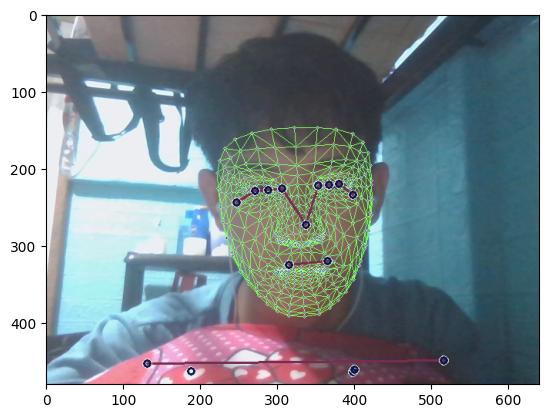

In [20]:
# initialized mediapipe model
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():
        # read feed
        ret, frame = cap.read()
        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # draw landmarks
        draw_landmarks(image,results)
        # show screen
        cv2.imshow('SLT Program', image)
        # break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [8]:

# Extract keypoints
# results.pose_landmarks
#pose = []
#for res in results.pose_landmarks.landmark:
#    test = np.array([res.x, res.y, res.z, res.visibility])
#    pose.append(test)


pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)

In [72]:
rh

array([ 2.74243832e-01,  9.31229949e-01, -2.46440720e-07,  3.39719653e-01,
        8.83113861e-01, -2.12252662e-02,  3.85041296e-01,  7.80117512e-01,
       -2.80254856e-02,  4.15932447e-01,  7.00554073e-01, -3.57317738e-02,
        4.49271053e-01,  6.55630529e-01, -4.30074222e-02,  3.41261029e-01,
        6.72613263e-01, -1.90497059e-02,  3.50928962e-01,  5.61864138e-01,
       -3.58009115e-02,  3.54252994e-01,  4.97351110e-01, -4.16496359e-02,
        3.57190102e-01,  4.41959053e-01, -4.55589965e-02,  2.94284731e-01,
        6.73991084e-01, -2.36569699e-02,  2.98869789e-01,  6.11336589e-01,
       -7.26049319e-02,  3.10994118e-01,  6.92865610e-01, -8.79057199e-02,
        3.17557991e-01,  7.62561679e-01, -8.47224966e-02,  2.49104246e-01,
        6.89936936e-01, -3.01663075e-02,  2.45612621e-01,  6.32415771e-01,
       -7.53930658e-02,  2.66818076e-01,  7.04485059e-01, -7.97185898e-02,
        2.80420810e-01,  7.64501929e-01, -6.96108639e-02,  2.06766248e-01,
        7.15904295e-01, -

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
result_test = extract_keypoints(results)

array([ 0.52765429,  0.57043785, -1.4879837 , ...,  0.        ,
        0.        ,  0.        ])

array([ 0.52765429,  0.57043785, -1.4879837 , ...,  0.        ,
        0.        ,  0.        ])

In [23]:
# FOLDERS FOR DATA COLLECTION, NUMPY ARRRAYS
DATA_PATH = os.path.join('MP_Data')
# ACTIONS TO DETECT
actions = np.array(['tanga', 'bobo', 'pakyu'])
no_sequences = 30
#no of frames
sequence_length = 30

In [24]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    for action in actions:
        for sequence in range(no_sequence):
            for frame_num in range(sequence_length):        
                # read feed
                ret, frame = cap.read()
                # make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                # draw landmarks
                draw_landmarks(image,results)
                # collections
                if frame_num = 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255,90), 4, cv2.LINE_AA)
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} SEQUENCE NUMBER {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                     cv2.putText(image, 'COLLECTING FRAMES FOR {} SEQUENCE NUMBER {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                   
                
                # show screen
                cv2.imshow('SLT Program', image)
                
        # break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

